# Guia regresión 
## Consigna
Para el dataset a continuación, calcular la regresión polinómica e ir variando el orden hasta obtener el resultado óptimo de AIC y BIC. También calcular $ R^2 $ y los p values.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

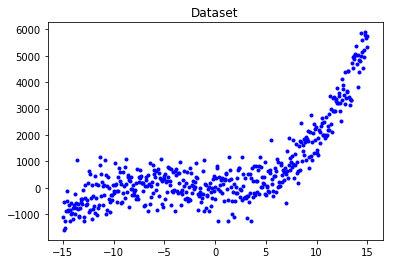

In [4]:
x = np.load('X.npy')
y = np.load('y.npy')
plt.figure()
plt.plot(x, y, '.',  color='blue')
plt.title('Dataset')
plt.show()

## Solución

In [5]:
def show_data(x, y, df, grado):
    model = sm.OLS(y, df).fit()
    plot(x, y, model.predict(), 'Grado ' + grado)
    print("=== pvalues ===")
    print(model.pvalues)
    print("AIC =>", model.aic)
    print("BIC =>", model.bic)
    print("======================================================================")

def plot(x, first_y, second_y, title='', first_color='blue', second_color='red'):
    plt.figure()
    plt.plot(x, first_y, '.',  color=first_color)
    plt.plot(x, second_y, c=second_color, linewidth=2)
    plt.title(title)
    plt.show()
    
def trim_train_test(df, percent=0.7):
    msk = np.random.rand(len(df)) < percent
    return df[msk], df[~msk]


###### Graficamos y comparamos resultados de los primeros 10 grados

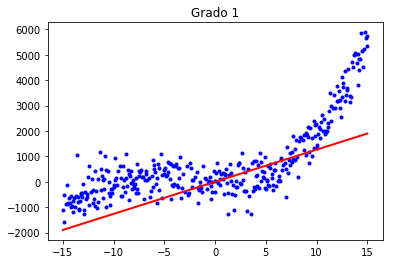

=== pvalues ===
1    1.188387e-50
dtype: float64
AIC => 6417.404629123928
BIC => 6421.334218267319


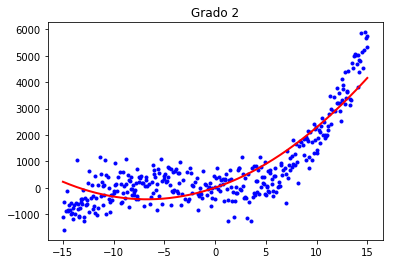

=== pvalues ===
1    4.814118e-105
2     9.875201e-89
dtype: float64
AIC => 6017.947794870379
BIC => 6025.806973157159


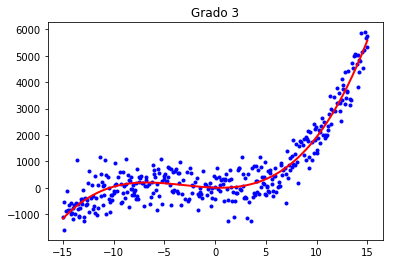

=== pvalues ===
1     1.317713e-01
2    1.132512e-138
3     6.661027e-69
dtype: float64
AIC => 5709.307962352475
BIC => 5721.0967297826455


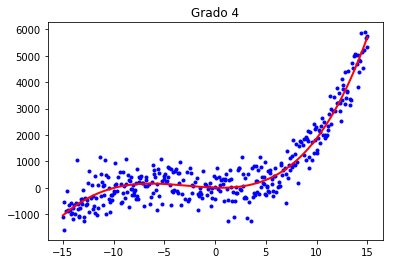

=== pvalues ===
1    1.228817e-01
2    7.433510e-21
3    3.573368e-69
4    9.147369e-02
dtype: float64
AIC => 5708.42522056264
BIC => 5724.143577136199


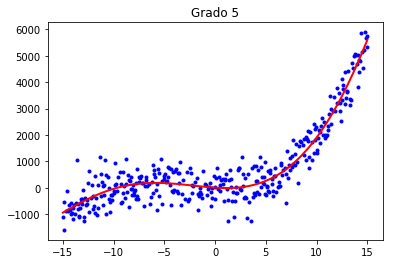

=== pvalues ===
1    5.444876e-02
2    6.128030e-21
3    2.317309e-09
4    9.338232e-02
5    2.031154e-01
dtype: float64
AIC => 5708.781346485521
BIC => 5728.429292202471


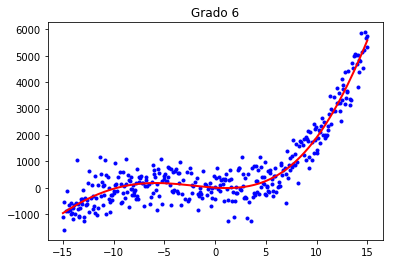

=== pvalues ===
1    5.491750e-02
2    2.571262e-05
3    2.451961e-09
4    6.193633e-01
5    2.044499e-01
6    8.464973e-01
dtype: float64
AIC => 5710.743210355091
BIC => 5734.32074521543


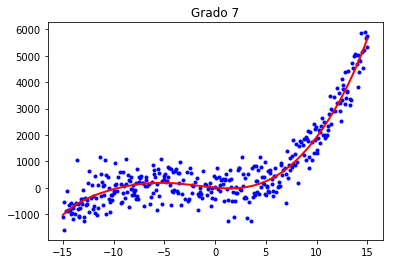

=== pvalues ===
1    0.069033
2    0.000023
3    0.003937
4    0.638613
5    0.359254
6    0.863310
7    0.465531
dtype: float64
AIC => 5712.199808115825
BIC => 5739.706932119555


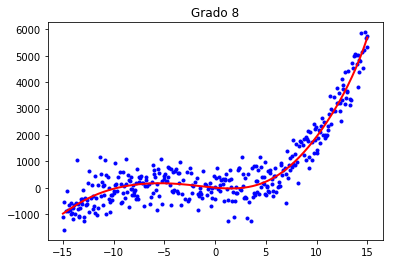

=== pvalues ===
1    0.070743
2    0.054651
3    0.004005
4    0.533146
5    0.359567
6    0.602377
7    0.465384
8    0.615416
dtype: float64
AIC => 5713.941608667159
BIC => 5745.378321814278


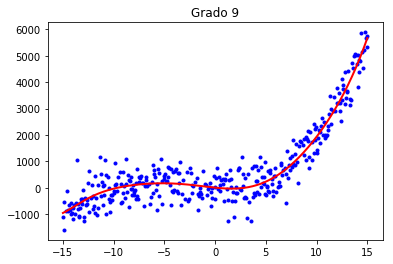

=== pvalues ===
1    0.141339
2    0.054096
3    0.123884
4    0.538380
5    0.624370
6    0.607215
7    0.732978
8    0.619676
9    0.796593
dtype: float64
AIC => 5715.873446897676
BIC => 5751.239749188186


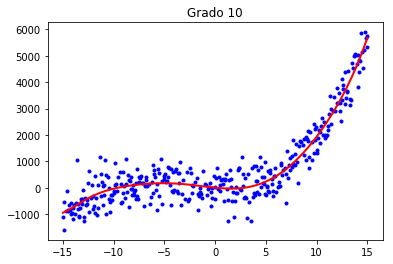

=== pvalues ===
1     0.141784
2     0.206350
3     0.124851
4     0.880747
5     0.626614
6     0.984075
7     0.735373
8     0.959847
9     0.798958
10    0.918231
dtype: float64
AIC => 5717.862604463362
BIC => 5757.158495897261


In [6]:
N = 10
train, test = trim_train_test(pd.DataFrame({0: x, 1: y}), 0.75)
train_potencies = pd.DataFrame()
test_potencies = pd.DataFrame()
for i in range(1, N + 1):
    train_potencies[i] = pow(train[0], i)
    test_potencies[i] = pow(test[0], i)
    show_data(train[0], train[1], train_potencies, str(i))

El de mejor performance comparando AIC y BIC es el de grado 3, aunque se puede observar que hay un pvalue que es mayor a 0.05<br />
Por lo tanto quitamos esa columna y nos quedamos con la columna 2 y 3 y vemos que es cuando mejor performance obtenemos

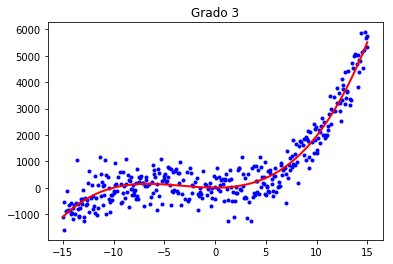

=== pvalues ===
2    1.109058e-138
3    1.094594e-171
dtype: float64
AIC => 5709.60081352855
BIC => 5717.45999181533


In [7]:
train_potencies = train_potencies.iloc[:,1:3]
show_data(train[0], train[1], train_potencies, "3")

###### Probamos el algoritmo con los datos de prueba

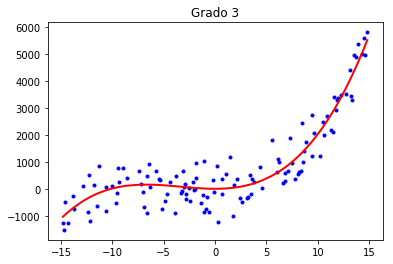

=== pvalues ===
2    8.210131e-40
3    1.206248e-49
dtype: float64
AIC => 1921.0164035175505
BIC => 1926.6569666487605


In [8]:
test_potencies = test_potencies.iloc[:,1:3]
show_data(test[0], test[1], test_potencies, "3")